In [48]:
import zipfile
import pytesseract
import cv2 as cv
import numpy as np
import tqdm
from PIL import Image, ImageDraw, ImageFont
from zipfile import ZipFile 
from termcolor import colored

In [79]:
usr_input = input("For which wword are you looking for?").lower()
usr_input

'toxic'

In [75]:
file = r'c:\Users\massimiliano.canosi\Downloads\images.zip'

In [3]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

In [28]:
with ZipFile(file, mode = 'r') as opener:
    name_lst = opener.namelist()
    file_info = opener.infolist()
    for i in range(len(name_lst)):
        print(colored(f"-- File {i} info", color='yellow', attrs=['bold']))
        print("Name: " + colored(f"{name_lst[i]}", color='green', attrs=['underline']))
        print(file_info[i])
        print(colored("Image retrieved correctly!\n", color='green', attrs=['underline']))

-- File 0 info
Name: a-0.png
<ZipInfo filename='a-0.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=21000053 compress_size=20825784>
Image retrieved correctly!

-- File 1 info
Name: a-1.png
<ZipInfo filename='a-1.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=22598429 compress_size=20777241>
Image retrieved correctly!

-- File 2 info
Name: a-10.png
<ZipInfo filename='a-10.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=18166003 compress_size=17958880>
Image retrieved correctly!

-- File 3 info
Name: a-11.png
<ZipInfo filename='a-11.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=7458745 compress_size=6390977>
Image retrieved correctly!

-- File 4 info
Name: a-12.png
<ZipInfo filename='a-12.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=2421677 compress_size=2170555>
Image retrieved correctly!

-- File 5 info
Name: a-13.png
<Zi

In [50]:
pytesseract.pytesseract.tesseract_cmd = r'c:\Users\massimiliano.canosi\AppData\Local\Tesseract-OCR\tesseract.exe'

## Text Recognition

In [64]:
ref_dict = {}

with ZipFile(file, mode = 'r') as reader:
    name_lst = reader.namelist()
    file_info = reader.infolist()
    for i,v in enumerate(name_lst):

        ifile = reader.open(name_lst[i])
        text = pytesseract.image_to_string(Image.open(ifile))
        
        ref_dict[v] = {}
        ref_dict[v]['text'] = text.lower()

ref_dict

{'a-0.png': {'text': "ann arbor, michigan\n\nwednesday, november 5, 2014\n\nche michigan daily\n\nmichigandaily.com\n\nbig day for republicans\n\nsnyder earns second term; g.o.p. takes control of u.s. senate\n\nstate\n\nexecutive\ngovernor\nrick snyder (r)\n\nlieutenant\ngovernor\nbrian calley (r)\n\nsecretary of\nstate\nruth johnson (r)\n\nstate\njudicial\n\nattorney general\nbill schuette cr)\n\nmichigan\nlegislative\n\nmichigan state\nsenate\nrebekah warren (d)\n\nmichigan house\nof representatives\njeff irwin cd)\n\nu.s.\nlegislative\n\nu.s. senate\ngary peters (d)\n\nu.s. house of\nrepresentatives\ndebbie dingell (d)\n\nwashtenaw\ncounty\n\nprobate court\njulia owdziej (d)\n\ncircuit court\npatrick conlin (d)\n\nann arbor\nmayor\nchristopher taylor (d)\n\ncity council\n\nsumi kailasapathy (d)\nchuck warpehoski (d)\njulie grand (d)\ngraydon kraphol (d)\nkirk westphal (d)\n\nregents\n\ntoo close to call\n\nhi: 51\nlo: 30\n\nweather\ntomorrow\n\ntop: republican gov. rick snyder celeb

## Manual Thresholding

In [70]:
with ZipFile(file, mode = 'r') as reader:
    name_lst = reader.namelist()
    file_info = reader.infolist()
    for i,v in enumerate(name_lst):

        ifile = reader.open(name_lst[i])


        img = Image.open(ifile)
        banner = Image.new('RGB', (img.width, 80), color='white')
        background = Image.new('RGB', (img.width, 350 + banner.height))
        new_img = background.copy()
        new_img.paste(banner, (0,0))
        font = ImageFont.truetype('c:\windows\Fonts\ARIAL.TTF', 50)


        np_image = np.array(img)

        cv_img_binarization = cv.threshold(np_image, 140,160,cv.THRESH_BINARY)[1]


        faces  = face_cascade.detectMultiScale(cv_img_binarization)

        # openCV IMAGE COORDINATES ARE (X,Y,W,H)
        try:
            faces_lst = faces.tolist()
            faces_lst.sort(key = lambda x: x[3], reverse=True)
        except:
            pass

        if faces_lst:

            W_img_to_paste = 0
            Y_img_to_paste = 0+banner.height

            for face_coord in faces_lst:
                # PIL IMAGE COORDINATES ARE (x1,y1,x2,y2)
                # In order to find x2 you have to sum the starting point "x1" and the total widht of the rectangle "W"
                x,y,w,h = face_coord
                face_region = Image.fromarray(np_image[y:y+h, x:x+w])
                new_img.paste(face_region,(0+W_img_to_paste, Y_img_to_paste))
                W_img_to_paste += face_region.width   
                text = f"Results found in file {name_lst[i]}" 
        else:

            text = f"Results found in file {name_lst[i]}\nBut there were no faces in that file!" 

        draw = ImageDraw.Draw(new_img)
        draw.text((0, 0), text, font=font, fill=(0,0,0,255))
        # display(new_img)

        ##############################################################################
        
        ref_dict[v]['imgs'] = new_img
            

In [80]:
ref_dict

{'a-0.png': {'text': "ann arbor, michigan\n\nwednesday, november 5, 2014\n\nche michigan daily\n\nmichigandaily.com\n\nbig day for republicans\n\nsnyder earns second term; g.o.p. takes control of u.s. senate\n\nstate\n\nexecutive\ngovernor\nrick snyder (r)\n\nlieutenant\ngovernor\nbrian calley (r)\n\nsecretary of\nstate\nruth johnson (r)\n\nstate\njudicial\n\nattorney general\nbill schuette cr)\n\nmichigan\nlegislative\n\nmichigan state\nsenate\nrebekah warren (d)\n\nmichigan house\nof representatives\njeff irwin cd)\n\nu.s.\nlegislative\n\nu.s. senate\ngary peters (d)\n\nu.s. house of\nrepresentatives\ndebbie dingell (d)\n\nwashtenaw\ncounty\n\nprobate court\njulia owdziej (d)\n\ncircuit court\npatrick conlin (d)\n\nann arbor\nmayor\nchristopher taylor (d)\n\ncity council\n\nsumi kailasapathy (d)\nchuck warpehoski (d)\njulie grand (d)\ngraydon kraphol (d)\nkirk westphal (d)\n\nregents\n\ntoo close to call\n\nhi: 51\nlo: 30\n\nweather\ntomorrow\n\ntop: republican gov. rick snyder celeb

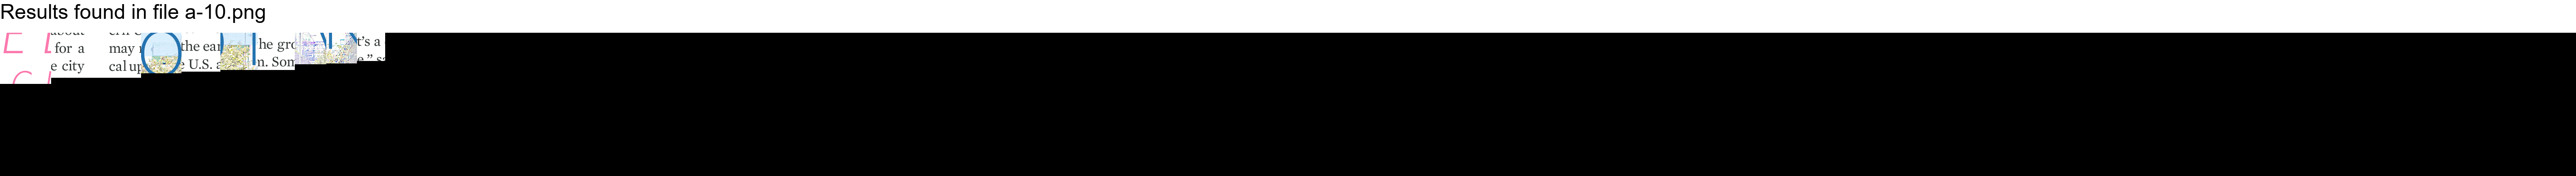

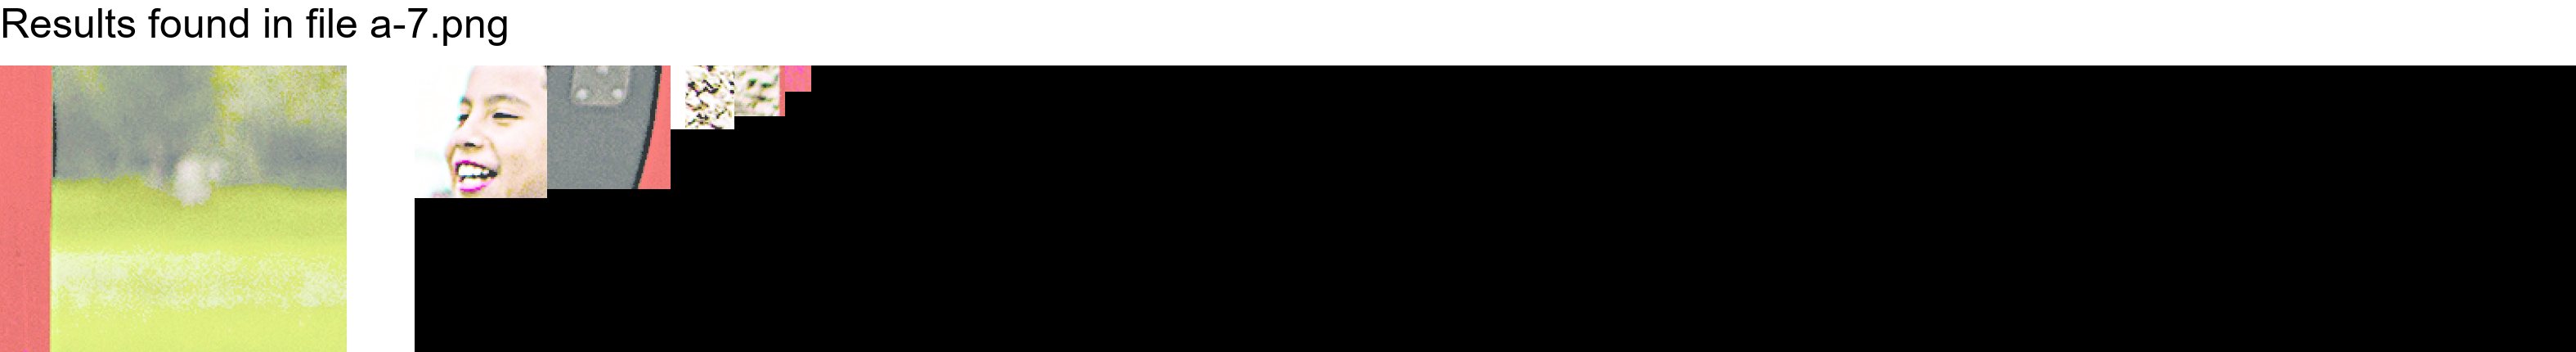

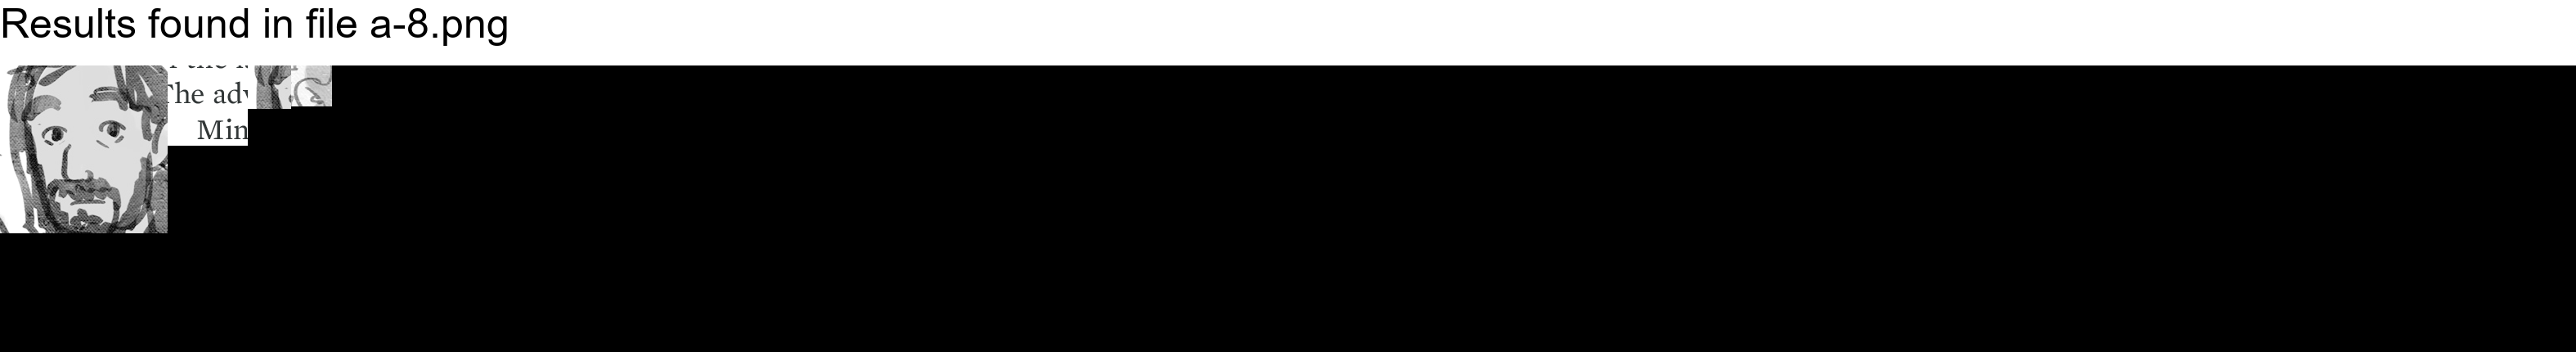

In [81]:
for k,v in ref_dict.items():
    if usr_input in v['text']:
        display(v['imgs'])